# Artificial Neural Networks

This is a techniques created by Geoffrey Hinton in the 80's. "Deep" refers to all the hidden layers used in the Dynamic Programming algorithms. The green circles are Neurons.

<br> The Input Layer observations and Output refer to **ONE** row of data. Adjustment of the Weights (neuron synapses) is how NNs learn, they decide the strength and importance of signals that are passed along or blocked by an Activation Function.

<br>
<img src="attachment:1%20-%20Deep%20Learning.png" width="600">
<br>
<br>
<img src="attachment:2%20-%20Neuron.png" width="600">
<br>

Input variable Feature Scaling (Standardize or Normalize) makes it easy for Neural Nets to process data by bringing their values close to eachother, read **Efficient BackPropagation.pdf**.


<br>
\begin{equation*}
X_{Standardized} = \frac{X - Min(X)}{Max(X) - Min(X)} 
\end{equation*}

<br>
$$
X_{Normalized} = \frac{X - μ (Mean)}{σ (Standard Deviation)} 
$$
<br>


# Activation Function

Here is a list of some NN Activation Functions. Read **Deep sparse rectifier neural networks.pdf**.
<br>
1. Threshold Function - Rigid binary style function
2. Sigmoid Function - Smooth, good for Output Layers that  predict probability
3. Rectifier Function - Gradually increases as Input Value increases
4. Hyperbolic Tangent Function - Similar to Sigmoid Function but values can go below zero
<br>


Activation | Functions 
- | - 
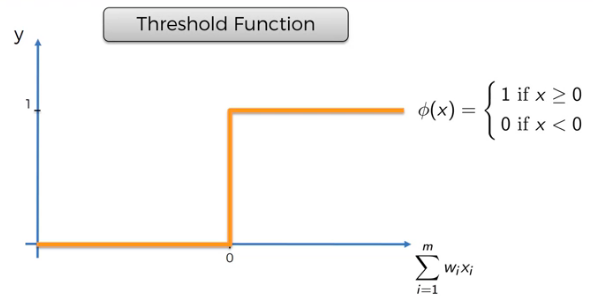 | 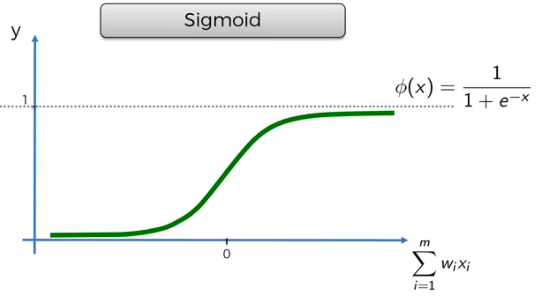 
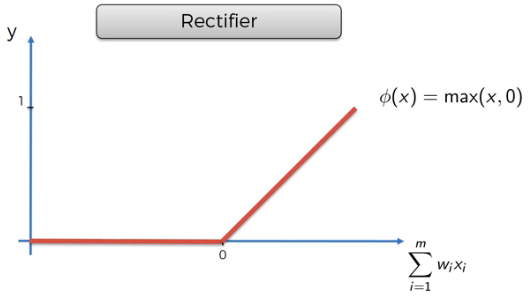 | 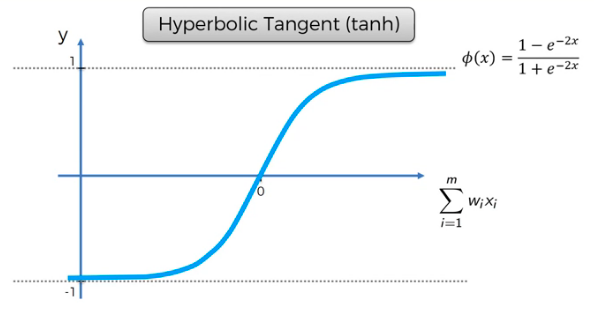

<br>
Different layers of a Neural Net can use different Activation Functions.
<br>

<img src="attachment:7%20-%20NN%20Activation%20Example.png" width="600">


# Cost Function

The Cost Function is a plot of the differences between the target and the network's output, which we try to minimize through weight adjustments (Backpropagation) in epochs (one training cycle on the Training Set). Once Input information is fed through the network and a y_hat Output estimate is found (Forward-propagation), we take the error and go back through the network and adjust the weights (Backpropagation Algorithm). The most common cost function is the Quadratic (Root Mean Square) cost:

<br>
$$
Cost = \frac{(\hat y - y)^2}{2} = \frac{(Wighted Estimate - Actual)^2}{2} 
$$
<br>

Read this [Deep Learning Book](http://neuralnetworksanddeeplearning.com/index.html) and this [List of Cost Functions Uses](https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications?).


# Batch Gradient Descent

This is a Cost minimization technique that looks for downhill slopes and works on **Convex Cost Functions**.

1-D Gradient Descent | 2-D Gradient Descent | 3-D Gradient Descent
:------ | :------ | :------
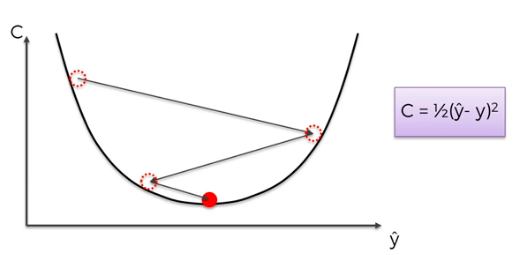 | 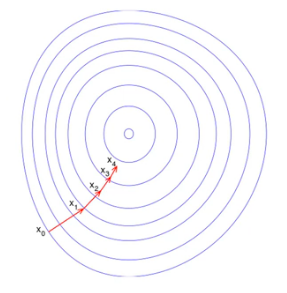 | 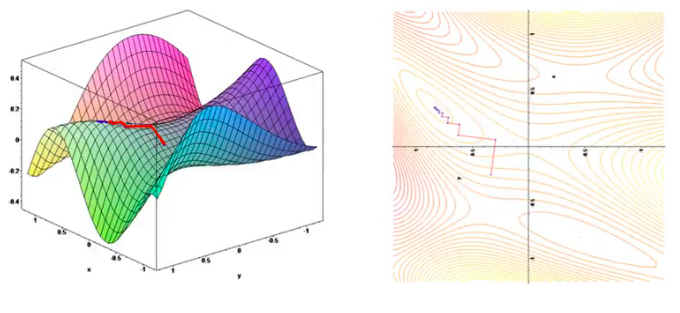


# Reinforcement Learning (Stochastic Gradient Descent)


This method is faster & more accurate than Batch Gradient Descent.
<br>
<br>
In order to avoid the Local Minimum trap, we can take more spuratic steps in random directions to increase the likelyhood of finding the Global Minimum. We can achieve this by adjusting Weights one Row at a time (Stochastic Gradient Descent) instead of all-at-once (Batch Gradient Descent). Read **Neural Network in 13 lines of Python**

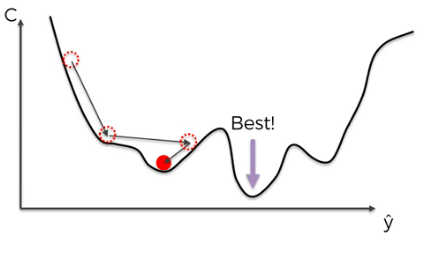

These are the steps for Stochastic Gradient Descent:
1. Initialize Weights to small numbers close to 0 (but NOT 0)
2. Input first row of Observation Data into Input Layer
3. Forward-propagate: Apply Weights to Inputs to get predicted result y_hat
4. Compute Error = y_hat - y_actual
5. Back-propagate: Update Weights according to the Learning Rate and how much they're responsible for the Error.
6. Repeat steps 1-5 after each observation (Reinforcement Learning), or after eatch batch (Batch Gradient Descent)
7. After Training Set passes through the Artificial Neural Network that's an Epoch. Redo more Epochs.


# Evaluating the ANN

Be careful when measuring the accuracy of a model. Bias and Variance can differ every time the model is evaluated. To solve this problem we can use K-Fold Cross Validation which splits the data into multiple segments and averages overall accuracy.

<img src="attachment:13%20-%20Bias-Variance%20Tradeoff.png" width="400">

<img src="attachment:14%20-%20K-Fold%20Cross%20Validation.png" width="400">



# Overfitting

This is when the Model is trained too much on the Training Set, this reduces performance on the Test Set. Spot Overfitting when:

1. Training and Test Accuracies have a large difference
2. Observing High Accuracy Variance when applying K-Fold Cross Validation

Solve Overfitting with "Dropout Regularization", this randomly disables Neurons through itterations so they don't grow too dependent on eachother. Thus the NN learns several independent correlations from the Data.


In [ ]:
# Artificial Neural Network
# Part 1 - Data Preprocessing

# Pip Install libraries in Terminal
# Install Theano (U. Montreal NumPy computation that can run on GPU or CPU, when parallel Float Point computation is important)
# Install Tensorflow (Google, same as above)
# Install Keras (Combines the above 2 libraries)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/Users/mac/Google Drive/Python & RasPi/Udemy Deep Learning/Deep Learning Code/Volume 1 - Supervised Deep Learning/Part 1 - Artificial Neural Networks (ANN)/Churn_Modelling.csv')
# Extract Independat Variables (Matrix of Features / Observations)
X = dataset.iloc[:, 3:13].values
# Extract Dependant Variables Vector
y = dataset.iloc[:, 13].values

# Encoding categorical (Dep/Indep) data
# We need to convert non-number data into numbers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# In the Bank example: Convert France/Germany/Spain into 0/1/2
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
# In the Bank example: Convert Female/Male into 0/1
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
# Since our country categorical data is not ordinal (order doesn't matter)
# We need to create a Dummy variable
onehotencoder = OneHotEncoder(categorical_features = [1])
# Make all Depedent X objects have the same type (Float 64)
X = onehotencoder.fit_transform(X).toarray()
# Remove  column to avoid Dummy Variable trap
X = X[:, 1:]

# Encoding the Dependent Variable
# In Bank example we dont need to encode Dependent variables because it's already Binary
# Uncomment to activate the following code
#labelencoder_y = LabelEncoder()
#y = labelencoder_y.fit_transform(y)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# Test_size = 0.2 means 80% of data for training, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
# This steps Standardizes Input Data to ease computation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Artificial Neural Network
# Part 2 - Making the ANN

# Importing the Keras libraries and packages
import keras

# Required to initialize NN
from keras.models import Sequential

# Required to build Deep layers
from keras.layers import Dense

# Prevent Overfitting with Dropout Regularization
from keras.layers import Dropout

# Initialising the ANN Sequentially (can also initialize as Graph)
# We use Sequential because we have successive layers
# We call our NN "Classifier"
classifier = Sequential()

# Adding the input layer and the first hidden layerx
# This step initializes the Wights to small random numbers
# 'Units' is the number of hidden layers (begin with average of Input & Output layers = 11+1/2 = 6)
# 'Kernel_initializer': Initialize weights as small random numbers
# 'Input_dim': number Independent Variables
# 'Activation': Rectifier Activation Function ('relu') for Hidden Layers, Sigmoid Function for Output Layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Add Dropout Regularization to first layer to prevent Overfitting
# 'p': Fraction of Neurons to drop. Start with 0.1 (10% dropped) and increment by 0.1 until Overfitting is solved, don't go over 0.5
classifier.add(Dropout(p = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(p = 0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.add(Dropout(p = 0.1))

# Compiling the ANN
# 'optimizer': Algorithm used to find the best Weights. 'adam' is a popular Stochastic Gradient Descent Algorithm
# 'loss' = 'binary_crossentropy' is useful for Binary Outputs with logarithmic functions
# 'loss' = 'categorical_crossentropy' is useful for 3+ categorical Outputs
# 'metrics' =  Used to evaluate the ANN, requires list. We use 1 metric called 'accuracy'  
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
# Experiment to find best 'batch_size' and 'epochs'
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


In [ ]:
# Artificial Neural Network
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
# This gives a vector of probablities of Customers leaving the bank
# You can rank the probabilities of customers most likely to leave the bank
y_pred = classifier.predict(X_test)
# Choose a threshold of which customers leave or stay (use 50% as a starting threshold)
# This line converts probabilities into True/False
y_pred = (y_pred > 0.5)


# Predicting a single new observation
# Predict if the customer with the following informations will leave the bank:
# Geography: France
# Credit Score: 600
# Gender: Male
# Age: 40
# Tenure: 3
# Balance: 60000
# Number of Products: 2
# Has Credit Card: Yes
# Is Active Member: Yes
# Estimated Salary: 50000
# sc.transform Feature Scales the new prediction so the model will understand it
# Set 1 element as a float64 to set all to float64
new_prediction = classifier.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_prediction = (new_prediction > 0.5)


# Making the Confusion Matrix
# Tells you the number of correct vs. incorrect observations
# In the Confusion Matrix we get [1,1] + [2,2] Correct Predictions
# In the Confusion Matrix we get [1,2] + [2,1] Incorrect Predictions
# Compute accuracy = correct predictions / total predictions
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Measure accuracy percentage of the Training Set
accuracy = (cm[0,0] + cm[1,1])/2000*100


In [ ]:
# Artificial Neural Network
# Part 4 - Evaluating the ANN

# Evaluating the ANN
# Import K-Fold Cross Validation Libraries

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
# Set up NN as a function
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
# 'estimator': Object used to fit the data
# 'X': Features of the Training set
# 'y': Target variable of Training set
# 'cv': Number of Train Test Folds for K-Fold Cross Validation, start with 10, check for low Bias
# 'n_jobs': How many CPU cores to use. Use '-1' to use all available CPU cores for parallel computation
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
# We're looking for low Bias (means high Accuracy) & low Variance
# We will get 10 Accuracies
mean = accuracies.mean()
variance = accuracies.std()



In [ ]:
# Artificial Neural Network
# Part 5 - Improving and Tuning the ANN

# Dropout Regularization to reduce overfitting if needed
# GridSearch tries several Tuning Hyper Parameters to find the best ones

# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
# Try sklearn.grid_search if sklearn.model_selection doesn't work
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

# This function has an input (Optimizer) so we can try different ones
# 'Adam' and 'rmsprop' (also good for RNN) are good optimizers for stochastic gradient descent
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
# Build NN Classifier, we will train with K-Fold Cross Validation
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
# Fit Model to data using grid_search to try various Hyper Parameter
grid_search = grid_search.fit(X_train, y_train)
# Output best parameters
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
